## Ch12_Q10

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
# (a) Generate a simulated data set with 20 observations in each of three classes

np.random.seed(36)

n_obs = 20   
n_vars = 50  
n_classes = 3 
mean_shift = [0, 5, 10]  #每個類別的均值偏移
data_list = []

# Generate 20 observations for each of 3 classes with 50 variables
for i in range(n_classes):
    class_data = np.random.normal(loc=mean_shift[i], scale=1, size=(n_obs, n_vars))
    data_list.append(class_data)

# Combine the data
X = np.vstack(data_list)

print("Data shape:", X.shape)  # Should be (60, 50)

Data shape: (60, 50)


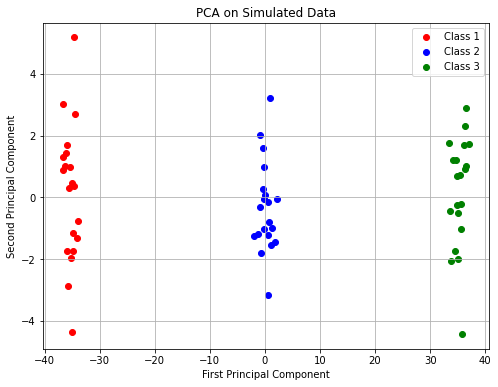

In [3]:
# (b) Perform PCA on the 60 observations and plot the first two principal component score vectors.

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
true_labels = np.array([0]*n_obs + [1]*n_obs + [2]*n_obs)
colors = ['red', 'blue', 'green']

plt.figure(figsize=(8,6))
for i in range(n_classes):
    plt.scatter(X_pca[true_labels==i, 0], X_pca[true_labels==i, 1],
            c=colors[i], label=f'Class {i+1}')

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA on Simulated Data')
plt.legend()
plt.grid(True)
plt.show()


KMeans Cluster   0   1   2
True Label                
0               20   0   0
1                0   0  20
2                0  20   0


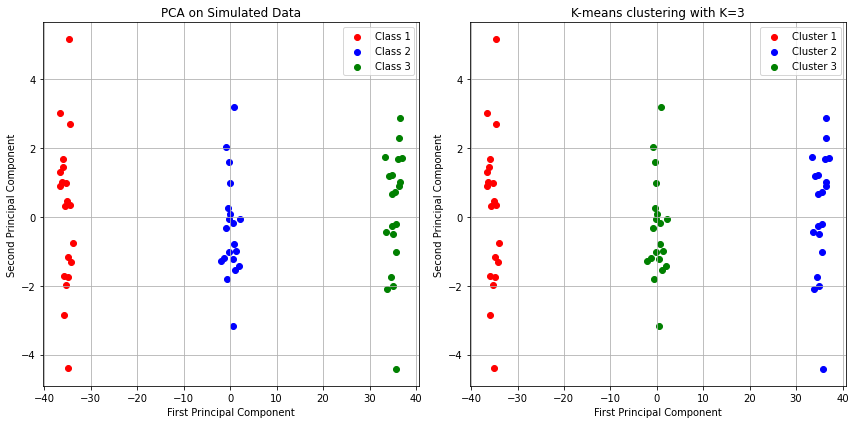

In [4]:
# (c) Perform K-means clustering with K = 3

kmeans = KMeans(n_clusters=3, random_state=36)
kmeans_labels = kmeans.fit_predict(X)

# Compare K-means clustering results to true labels
confusion = pd.crosstab(true_labels, kmeans_labels, 
                        rownames=['True Label'], colnames=['KMeans Cluster'])
print(confusion)

plt.figure(figsize=(12, 6))
for k in range(2):
    plt.subplot(1, 2, k+1)
    if k == 0:
        for i in range(n_classes):
            plt.scatter(X_pca[true_labels==i, 0], X_pca[true_labels==i, 1],
                        c=colors[i], label=f'Class {i+1}')
        plt.title('PCA on Simulated Data')
    else :
        for i in range(3):
            plt.scatter(X_pca[kmeans_labels==i, 0], X_pca[kmeans_labels==i, 1],
                        c=colors[i], label=f'Cluster {i+1}')
        plt.title('K-means clustering with K=3')
        
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.grid(True)
    plt.legend()
plt.tight_layout()
plt.show()

KMeans Cluster   0   1
True Label            
0               20   0
1                0  20
2                0  20


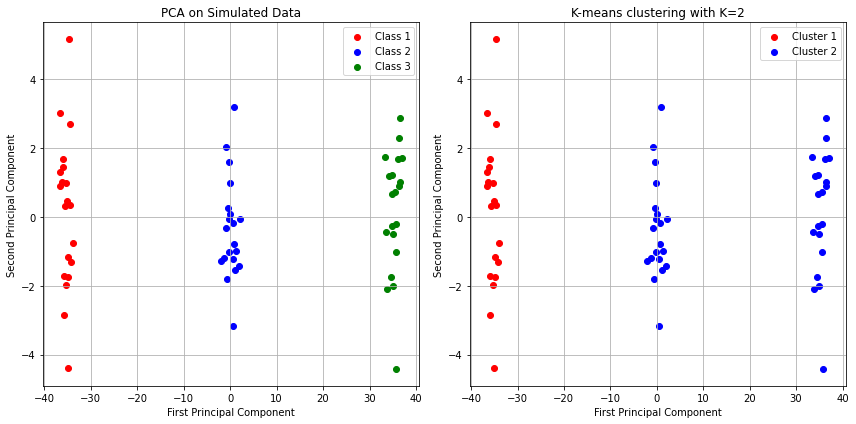

In [5]:
# (d) Perform K-means clustering with K = 2

kmeans = KMeans(n_clusters=2, random_state=36)
kmeans_labels = kmeans.fit_predict(X)

# Compare K-means clustering results to true labels
confusion = pd.crosstab(true_labels, kmeans_labels, 
                        rownames=['True Label'], colnames=['KMeans Cluster'])
print(confusion)

plt.figure(figsize=(12, 6))
for k in range(2):
    plt.subplot(1, 2, k+1)
    if k == 0:
        for i in range(n_classes):
            plt.scatter(X_pca[true_labels==i, 0], X_pca[true_labels==i, 1],
                        c=colors[i], label=f'Class {i+1}')
        plt.title('PCA on Simulated Data')
    else :
        for i in range(2):
            plt.scatter(X_pca[kmeans_labels==i, 0], X_pca[kmeans_labels==i, 1],
                        c=colors[i], label=f'Cluster {i+1}')
        plt.title('K-means clustering with K=2')
        
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.grid(True)
    plt.legend()
plt.tight_layout()
plt.show()

KMeans Cluster   0   1   2  3
True Label                   
0                0  11   0  9
1               20   0   0  0
2                0   0  20  0


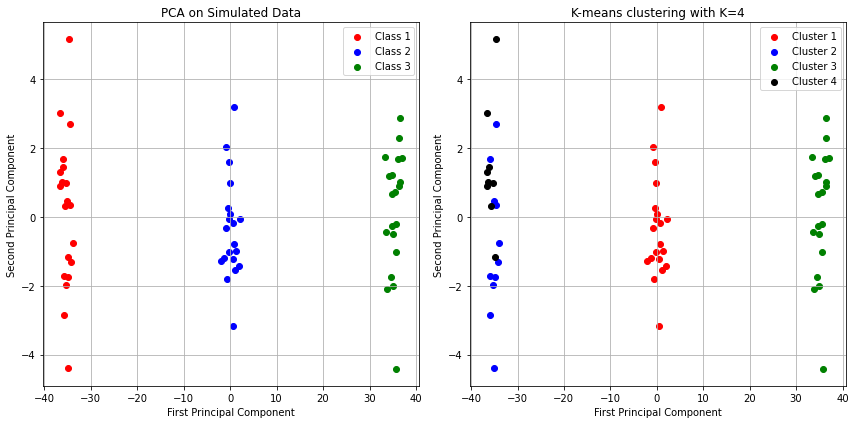

In [6]:
# (e) Perform K-means clustering with K = 4

kmeans = KMeans(n_clusters=4, random_state=36)
kmeans_labels = kmeans.fit_predict(X)

# Compare K-means clustering results to true labels
confusion = pd.crosstab(true_labels, kmeans_labels, 
                        rownames=['True Label'], colnames=['KMeans Cluster'])
print(confusion)


plt.figure(figsize=(12, 6))
colors = ['red', 'blue', 'green', 'black']
for k in range(2):
    plt.subplot(1, 2, k+1)
    if k == 0:
        for i in range(n_classes):
            plt.scatter(X_pca[true_labels==i, 0], X_pca[true_labels==i, 1],
                        c=colors[i], label=f'Class {i+1}')
        plt.title('PCA on Simulated Data')
    else :
        for i in range(4):
            plt.scatter(X_pca[kmeans_labels==i, 0], X_pca[kmeans_labels==i, 1],
                        c=colors[i], label=f'Cluster {i+1}')
        plt.title('K-means clustering with K=4')
        
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.grid(True)
    plt.legend()
plt.tight_layout()
plt.show()

KMeans Cluster   0   1   2
True Label                
0               20   0   0
1                0   0  20
2                0  20   0


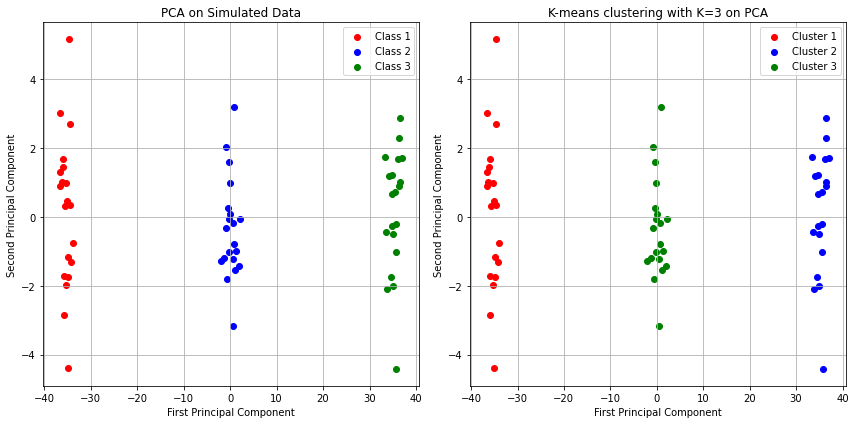

In [7]:
# (f) Perform K-means clustering with K = 3 on the 60 × 2 matrix

kmeans_pca = KMeans(n_clusters=3, random_state=36)
kmeans_pca_labels = kmeans_pca.fit_predict(X_pca)

# Compare K-means pca results to true labels
confusion_pca = pd.crosstab(true_labels, kmeans_pca_labels,
                            rownames=['True Label'], colnames=['KMeans Cluster'])
print(confusion_pca)

plt.figure(figsize=(12, 6))
for k in range(2):
    plt.subplot(1, 2, k+1)
    if k == 0:
        for i in range(n_classes):
            plt.scatter(X_pca[true_labels==i, 0], X_pca[true_labels==i, 1],
                        c=colors[i], label=f'Class {i+1}')
        plt.title('PCA on Simulated Data')
    else :
        for i in range(3):
            plt.scatter(X_pca[kmeans_pca_labels==i, 0], X_pca[kmeans_pca_labels==i, 1],
                        c=colors[i], label=f'Cluster {i+1}')
        plt.title('K-means clustering with K=3 on PCA')
        
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.grid(True)
    plt.legend()
plt.tight_layout()
plt.show()

By performing K-means clustering on the PCA results, we can gain the relationships and distributions between classes in the data. Such analysis helps us assess the model's effectiveness and its potential for practical applications. If the clustering results correlate well with the true labels, it indicates that the combination of PCA dimensionality reduction and K-means clustering is effective. Conversely, further adjustments to the model or data processing methods may be required.

KMeans Cluster   0   1   2
True Label                
0               20   0   0
1                0   0  20
2                0  20   0


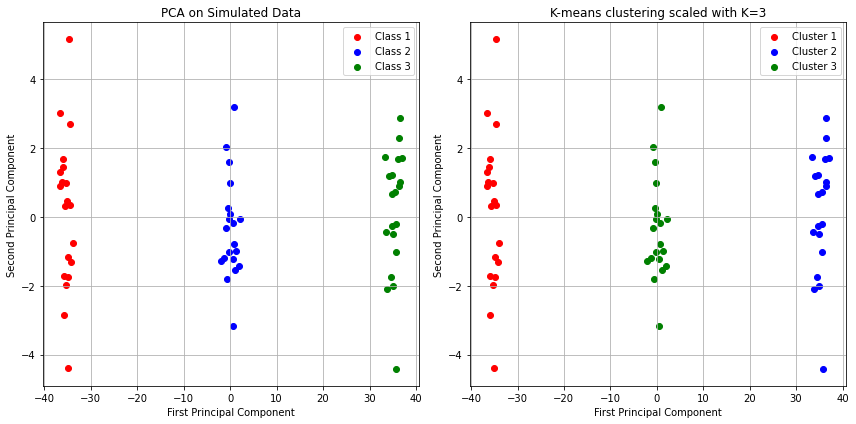

In [8]:
# (g) Perform K-means clustering with K = 3

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans_scaled = KMeans(n_clusters=3, random_state=36)
kmeans_scaled_labels = kmeans_scaled.fit_predict(X_scaled)

# Compare K-means scaled results to true labels
confusion_scaled = pd.crosstab(true_labels, kmeans_scaled_labels,
                               rownames=['True Label'], colnames=['KMeans Cluster'])
print(confusion_scaled)

plt.figure(figsize=(12, 6))
for k in range(2):
    plt.subplot(1, 2, k+1)
    if k == 0:
        for i in range(n_classes):
            plt.scatter(X_pca[true_labels==i, 0], X_pca[true_labels==i, 1],
                        c=colors[i], label=f'Class {i+1}')
        plt.title('PCA on Simulated Data')
    else :
        for i in range(3):
            plt.scatter(X_pca[kmeans_scaled_labels==i, 0], X_pca[kmeans_scaled_labels==i, 1],
                        c=colors[i], label=f'Cluster {i+1}')
        plt.title('K-means clustering scaled with K=3')
        
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.grid(True)
    plt.legend()
plt.tight_layout()
plt.show()

Usually, standardization not only improved the accuracy of clustering results but also enhanced the interpretability of visualizations and promoted consistency in the results. However, the clustering results in the two plots appear similar. Since the first two principal components likely capture the majority of the difference, the settings for range and scaling may affect the perceived distribution. 
In addition, the primary goal of PCA is to reduce dimensionality and extract the main components. If the features in the unstandardized data are already within a similar range, the impact of standardization may not be significant, resulting in similar PCA outcomes.